In [127]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as t
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

%matplotlib inline

In [128]:
df_1 = pd.read_csv('5_task_1.csv')
df_2 = pd.read_csv('5_task_2.csv')

### Task 1

Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.

In [129]:
A = df_1.query('group == "A"')
B = df_1.query('group == "B"')
C = df_1.query('group == "C"')

In [130]:
print('Answer:', t.levene(A.events, B.events, C.events))

Answer: LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)


### Task 2

Также убедитесь, что данные распределены нормально, применив тест Шапиро-Уилка. Перед применением критерия при проверке на нормальность обязательно сделайте семплирование (1000 наблюдений), так как на больших выборках могут получаться неверные результаты. Для воспроизводимости результата используйте параметр random_state=17 в методе sample.

Дополнительно: попробуйте посчитать тест Шапиро-Уилка без использования метода sample. Сравните  результат с normaltest, а также qq-графиками. Какой вывод можно сделать по совокупности этих методов?

In [131]:
A_s = A.sample(random_state=17, n=1000)
B_s = B.sample(random_state=17, n=1000)
C_s = C.sample(random_state=17, n=1000)

In [132]:
print('For A sampled:', t.shapiro(A_s.events))
print('For B sampled:', t.shapiro(B_s.events))
print('For C sampled:', t.shapiro(C_s.events))

For A sampled: ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)
For B sampled: ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)
For C sampled: ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)


Answer: Распределения во всех группах являются нормальными

### Task 3

In [133]:
print('Answer:', t.f_oneway(A.events, B.events, C.events))

Answer: F_onewayResult(statistic=2886.166657438961, pvalue=0.0)


Для сравнения средних я использовал ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ. Значение статистики равно ~2886, а р-value значимости составил 0.

### Task 4

Теперь используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 

In [134]:
print('Answer:\n', pairwise_tukeyhsd(df_1.events, df_1.group).summary())

Answer:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


Между всеми группами есть статистически значимые различия. 

### Task 5

Посмотрим на данные. Для начала визуализируйте распределение events для контрольной и тестовой групп.

In [135]:
control = df_2.query('group == "control"')
test = df_2.query('group == "test"')

<AxesSubplot:xlabel='events', ylabel='count'>

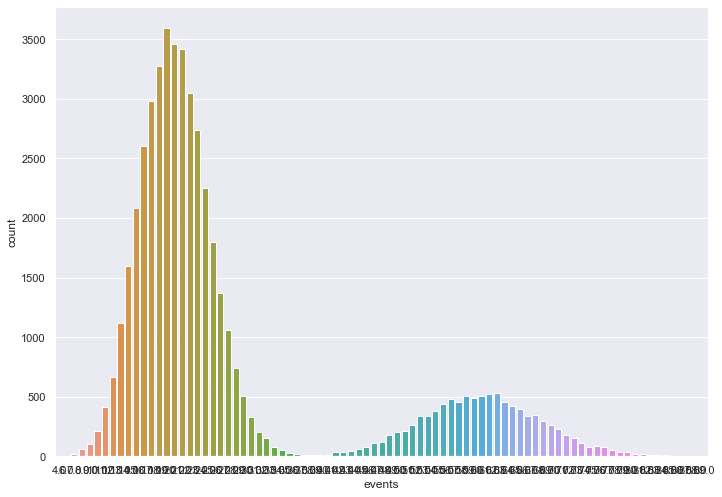

In [136]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=control.events)

<AxesSubplot:xlabel='events', ylabel='count'>

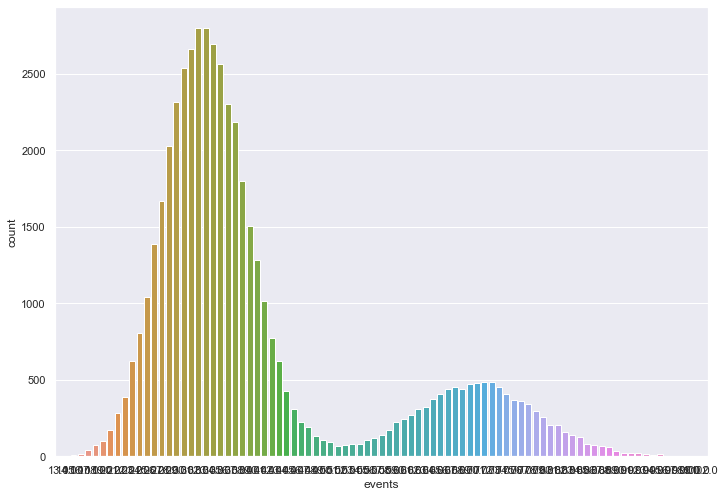

In [137]:
sns.countplot(x=test.events)

### Task 6

Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

В качестве ответа укажите стандартное отклонение для пользователей из сегмента high и контрольной группы, с точностью до 2 знаков после точки.

In [138]:
control.events.describe()

count    50000.000000
mean        28.019420
std         16.835133
min          4.000000
25%         18.000000
50%         21.000000
75%         27.000000
max         89.000000
Name: events, dtype: float64

In [139]:
test.events.describe()

count    50000.000000
mean        40.408440
std         16.072244
min         13.000000
25%         30.000000
50%         35.000000
75%         42.000000
max        102.000000
Name: events, dtype: float64

In [140]:
print('Answer:', round(control.query('segment == "high"').events.describe()[2], 2))

Answer: 7.81


### Task 7

Проведите тест (через anova_lm либо pg.anova), а затем используйте критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

В данном случае для последующих сравнений между группами можно проделать следующую операцию: соединить колонки group и segment в combination, чтобы потом передать в аргумент groups в MultiComparison либо pairwise_tukey:

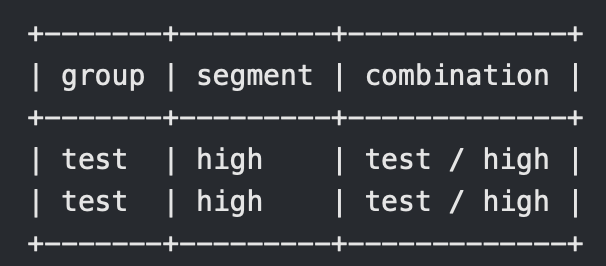

Между какими группами были обнаружены статистически значимые различия? Выберите верные утверждения:

In [141]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [147]:
model_control = ols('events ~ segment + group + segment:group', df_2).fit()

In [148]:
anova_control = anova_lm(model_control, typ=2)

In [151]:
df_2['combination'] = df_2['group'] + ' \ ' + df_2['segment']

In [153]:
print(pairwise_tukeyhsd(df_2.events, df_2.combination).summary())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2    meandiff p-adj  lower    upper   reject
--------------------------------------------------------------------
control \ high control \ low -39.9392 0.001 -40.1073 -39.7711   True
control \ high   test \ high   9.9677 0.001   9.7551  10.1803   True
control \ high    test \ low -26.9449 0.001  -27.113 -26.7768   True
 control \ low   test \ high  49.9069 0.001  49.7388   50.075   True
 control \ low    test \ low  12.9944 0.001   12.888  13.1007   True
   test \ high    test \ low -36.9126 0.001 -37.0807 -36.7445   True
--------------------------------------------------------------------


Answer:

- Разница между control/high и test/high составила около 10
- Для обоих сегментов показатели статистически значимо _увеличились_ по сравнению с контрольной группой
- Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13

### Task 8

Визуализируйте результаты теста и заполните пропуски:

Answer: Фактор group оказался ЗНАЧИМЫМ, фактор segment – ЗНАЧИМЫМ, их взаимодействие – ЗНАЧИМО. Судя по графику,для всех групп среднее значение events УВЕЛИЧИЛОСЬ, поэтому решение: ВЫКАТЫВАЕМ НОВУЮ ВЕРСИЮ.

Text(0, 0.5, 'Segment')

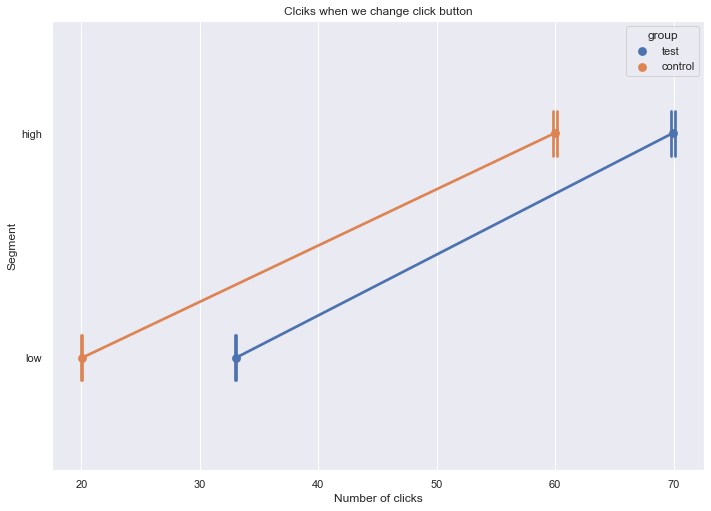

In [162]:
from matplotlib import pyplot as plt
sns.pointplot(x = 'events', y = 'segment', hue = 'group', data = df_2, capsize = .2)
plt.title('Clciks when we change click button')
plt.xlabel('Number of clicks')
plt.ylabel('Segment')
# plt.legend(title = 'Тип препарата')